<a href="https://colab.research.google.com/github/yewon-hong-ewha/ESAA-24-1/blob/main/%EB%B9%85%EB%B6%84%EB%B0%A9_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
3211776/512

6273.0

# 4.

In [ ]:
early_stop = EarlyStopping(monitor = 'loss', patience = 10)
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt, loss = 'mse', metrics = 'mse')
model.summary()

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/mpg_data.csv')
data.shape

(240, 8)

In [8]:
data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
0,8,318.0,150.0,3436.0,11.0,70,1,18.0
1,8,360.0,175.0,3821.0,11.0,73,1,13.0
2,8,350.0,170.0,4165.0,11.4,77,1,15.5
3,8,350.0,155.0,4502.0,13.5,72,1,13.0
4,8,318.0,150.0,4077.0,14.0,72,1,14.0


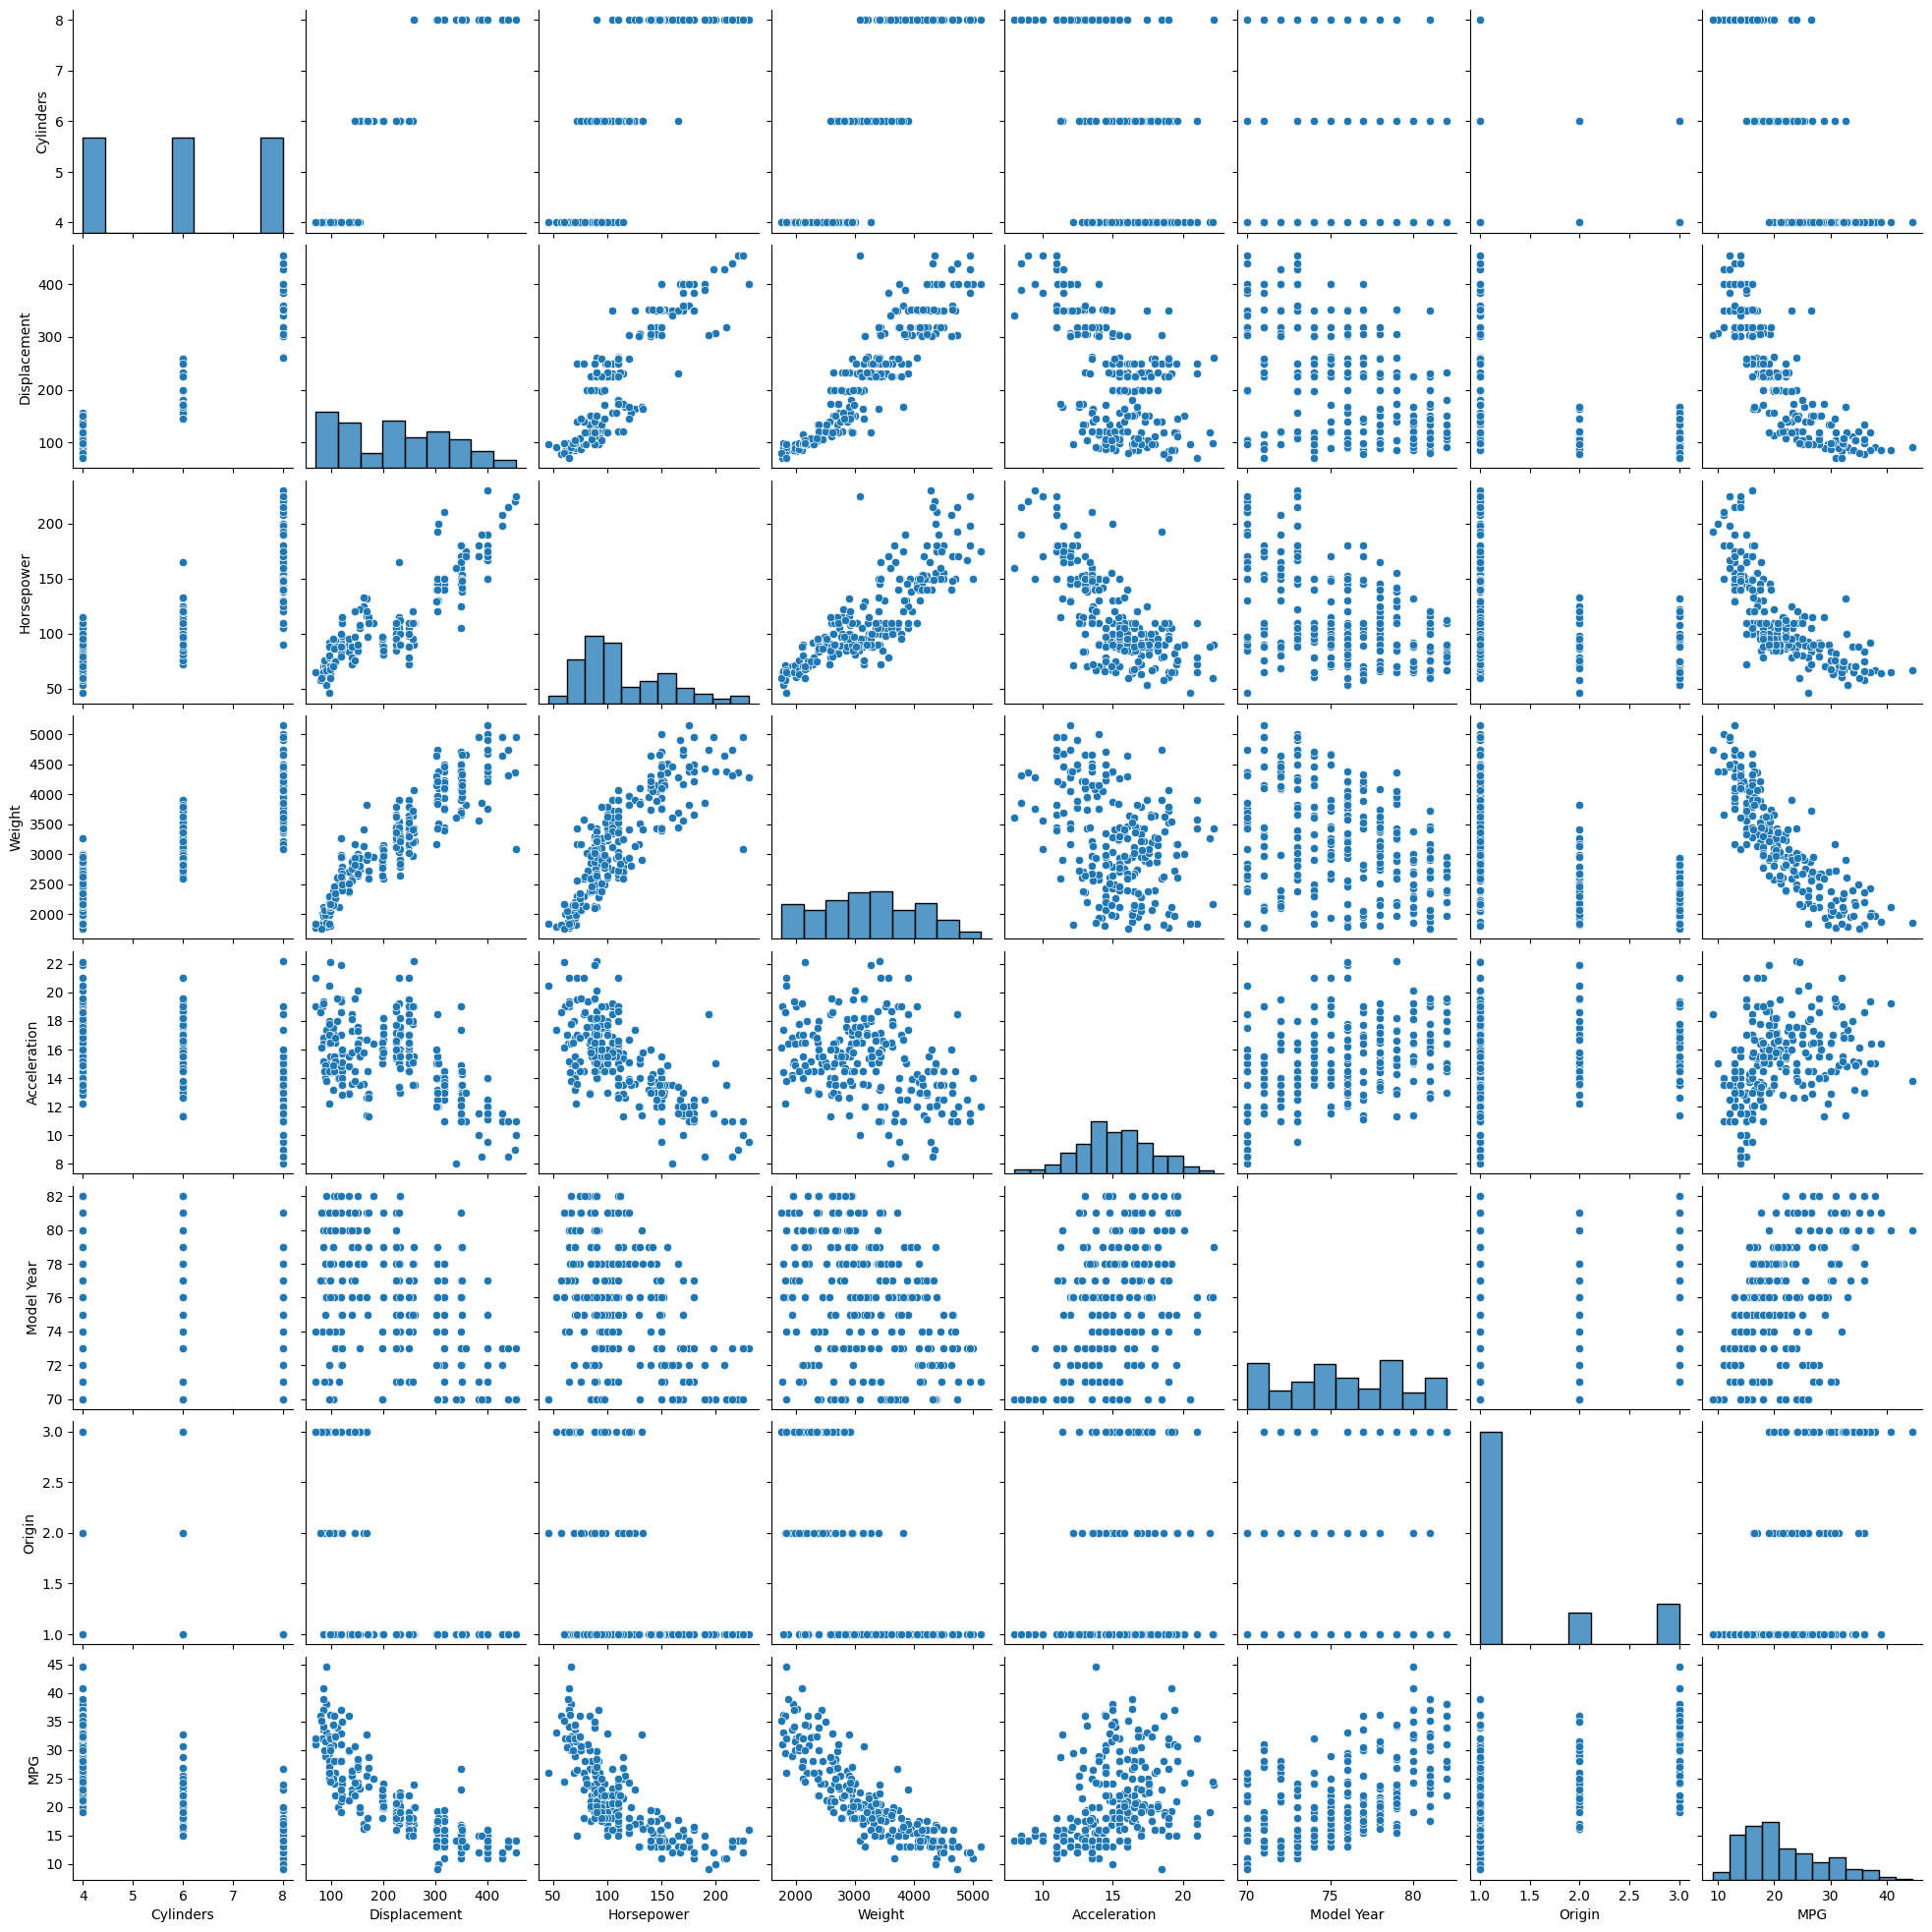

In [9]:
sns.pairplot(data)

In [13]:
data_enc = pd.get_dummies(data, columns = ['Cylinders', 'Origin'])
data_enc.head()

,Displacement,Horsepower,Weight,Acceleration,Model Year,MPG,Cylinders_4,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,318.0,150.0,3436.0,11.0,70,18.0,False,False,True,True,False,False
1,360.0,175.0,3821.0,11.0,73,13.0,False,False,True,True,False,False
2,350.0,170.0,4165.0,11.4,77,15.5,False,False,True,True,False,False
3,350.0,155.0,4502.0,13.5,72,13.0,False,False,True,True,False,False
4,318.0,150.0,4077.0,14.0,72,14.0,False,False,True,True,False,False


In [14]:
X = data_enc.drop('MPG', axis = 1)
y = data_enc['MPG']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
X_train_norm.shape

(168, 11)

In [21]:
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 11),
    Dense(32, activation = 'relu'),
    Dense(1)
])

opt = keras.optimizers.RMSprop(learning_rate=0.05)
model.compile(optimizer = opt, loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_norm, y_train, epochs = 10, batch_size = 32, validation_data = (X_test_norm, y_test), callbacks = [early_stop])

In [26]:
model.fit(X_train_norm, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
5/5 [==============================] - 1s 57ms/step - loss: 721.2731 - val_loss: 92.9764
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 46.5385 - val_loss: 23.3422
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 18.5960 - val_loss: 17.6190
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 14.7097 - val_loss: 15.9721
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 14.3260 - val_loss: 15.1927
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 13.2276 - val_loss: 24.1066
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 25.3172 - val_loss: 20.4522
Epoch 8/10
5/5 [==============================] - 0s 9ms/step - loss: 13.4497 - val_loss: 32.6430
Epoch 9/10
5/5 [==============================] - 0s 14ms/step - loss: 58.1915 - val_loss: 91.4898
Epoch 10/10
5/5 [==============================] - 0s 10ms/step - loss: 77.3033 - val_loss: 41.9343


In [28]:
score = model.evaluate(X_test_norm, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 37.2798


In [29]:
np.sqrt(score)

6.1057202268467385

In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_norm)
r2_score(y_test, y_pred)

3/3 [==============================] - 0s 4ms/step


0.2684852739338479

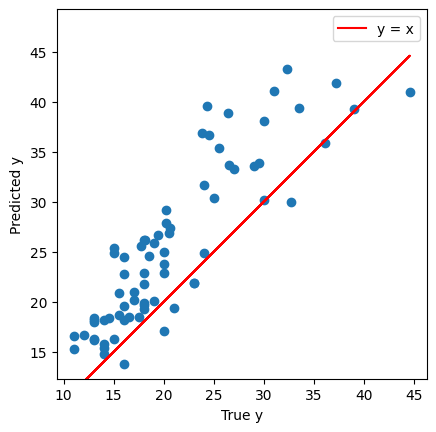

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.axis('equal')
plt.axis('square')
plt.plot(y_test, y_test, 'r', label = 'y = x')
plt.legend()
plt.show()

# 5

In [69]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:10000, :, :]
x_test = x_test[:2500, :, :]
y_train = y_train[:10000]
y_test = y_test[:2500]

In [70]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

10000
10000
2500
2500


In [71]:
x_train.shape

(10000, 28, 28)

In [72]:
img_rows = 28
img_cols = 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [73]:
x_train /= 255.
x_test /= 255.

In [74]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [75]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

num_classes = 10
input_shape = (img_rows, img_cols, 1)

model = Sequential([
    Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),
    BatchNormalization(),
    Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2), strides = 2),
    Dropout(0.5),
    Flatten(),
    Dense(num_classes, activation = 'softmax')
])

In [76]:
y_train.shape

(10000, 10)

In [77]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_10 (Ba  (None, 26, 26, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 batch_normalization_11 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                      

In [78]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
313/313 [==============================] - 32s 98ms/step - loss: 0.5256 - accuracy: 0.8688
Epoch 2/10
313/313 [==============================] - 35s 113ms/step - loss: 0.1930 - accuracy: 0.9509
Epoch 3/10
313/313 [==============================] - 40s 127ms/step - loss: 0.1411 - accuracy: 0.9615
Epoch 4/10
313/313 [==============================] - 39s 125ms/step - loss: 0.1234 - accuracy: 0.9679
Epoch 5/10
313/313 [==============================] - 39s 126ms/step - loss: 0.0890 - accuracy: 0.9731
Epoch 6/10
313/313 [==============================] - 37s 120ms/step - loss: 0.0779 - accuracy: 0.9797
Epoch 7/10
313/313 [==============================] - 56s 179ms/step - loss: 0.0637 - accuracy: 0.9814
Epoch 8/10
313/313 [==============================] - 31s 98ms/step - loss: 0.0634 - accuracy: 0.9832
Epoch 9/10
313/313 [==============================] - 31s 98ms/step - loss: 0.0573 - accuracy: 0.9824
Epoch 10/10
313/313 [==============================] - 32s 104ms/step - loss

In [79]:
loss, acc = model.evaluate(x_test, y_test)
acc

79/79 [==============================] - 2s 21ms/step - loss: 0.1743 - accuracy: 0.9644


0.9643999934196472

In [80]:
y_pred = model.predict(x_test)

79/79 [==============================] - 3s 34ms/step


In [81]:
from sklearn.metrics import confusion_matrix
y_pred_class = np.argmax(y_pred, axis = 1)
y_test_class = np.argmax(y_test, axis = 1)
conf_mat = confusion_matrix(y_test_class, y_pred_class)

In [82]:
label = range(10)
tabel = pd.DataFrame(conf_mat, index = label, columns = label)
tabel

,0,1,2,3,4,5,6,7,8,9
0,215,0,1,0,0,1,2,0,0,0
1,0,282,0,3,1,1,0,0,0,0
2,3,2,266,1,1,0,0,2,1,0
3,1,0,0,242,0,8,0,3,0,0
4,0,0,0,0,265,0,1,0,2,7
5,0,0,0,2,0,218,1,0,0,0
6,2,2,0,0,1,6,213,0,1,0
7,0,1,4,1,0,1,0,250,0,0
8,5,0,0,2,0,0,0,3,231,1
9,0,0,0,1,5,5,0,2,2,229


## 5-2

In [83]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:10000, :, :]
x_test = x_test[:2500, :, :]
y_train = y_train[:10000]
y_test = y_test[:2500]

In [84]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

10000
10000
2500
2500


In [85]:
img_rows = 28
img_cols = 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [86]:
x_train /= 255.
x_test /= 255.

In [87]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [88]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

num_classes = 10
input_shape = (img_rows, img_cols, 1)

model = Sequential([
    Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),
    BatchNormalization(),
    Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling2D(pool_size = (2, 2), strides = 2),
    Flatten(),
    Dense(num_classes, activation = 'softmax')
])

In [89]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_12 (Ba  (None, 26, 26, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 batch_normalization_13 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)       

In [90]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
313/313 [==============================] - 34s 103ms/step - loss: 0.4687 - accuracy: 0.8888
Epoch 2/10
313/313 [==============================] - 33s 105ms/step - loss: 0.1766 - accuracy: 0.9553
Epoch 3/10
313/313 [==============================] - 32s 102ms/step - loss: 0.1368 - accuracy: 0.9657
Epoch 4/10
313/313 [==============================] - 32s 102ms/step - loss: 0.0974 - accuracy: 0.9758
Epoch 5/10
313/313 [==============================] - 33s 106ms/step - loss: 0.0789 - accuracy: 0.9786
Epoch 6/10
313/313 [==============================] - 32s 102ms/step - loss: 0.0578 - accuracy: 0.9844
Epoch 7/10
313/313 [==============================] - 32s 101ms/step - loss: 0.0536 - accuracy: 0.9857
Epoch 8/10
313/313 [==============================] - 41s 132ms/step - loss: 0.0519 - accuracy: 0.9846
Epoch 9/10
313/313 [==============================] - 34s 108ms/step - loss: 0.0632 - accuracy: 0.9822
Epoch 10/10
313/313 [==============================] - 33s 106ms/step - l

In [91]:
loss, acc = model.evaluate(x_test, y_test)
acc

79/79 [==============================] - 2s 24ms/step - loss: 0.2877 - accuracy: 0.9464


0.946399986743927

In [92]:
y_pred = model.predict(x_test)

79/79 [==============================] - 3s 35ms/step


In [93]:
from sklearn.metrics import confusion_matrix
y_pred_class = np.argmax(y_pred, axis = 1)
y_test_class = np.argmax(y_test, axis = 1)
conf_mat = confusion_matrix(y_test_class, y_pred_class)

In [96]:
conf_mat

array([[219,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 286,   1,   0,   0,   0,   0,   0,   0,   0],
       [  5,   2, 260,   5,   1,   0,   1,   0,   1,   1],
       [  1,   0,   0, 249,   0,   3,   0,   0,   1,   0],
       [  1,   0,   0,   0, 269,   0,   2,   0,   1,   2],
       [  5,   0,   0,   5,   1, 199,   6,   0,   1,   4],
       [  5,   2,   0,   0,   1,   0, 217,   0,   0,   0],
       [  0,  14,  11,   6,   3,   0,   0, 211,   1,  11],
       [  7,   0,   0,   4,   2,   0,   1,   2, 225,   1],
       [  1,   4,   0,   2,   4,   1,   0,   0,   1, 231]])

In [94]:
label = range(10)
tabel = pd.DataFrame(conf_mat, index = label, columns = label)
tabel

,0,1,2,3,4,5,6,7,8,9
0,219,0,0,0,0,0,0,0,0,0
1,0,286,1,0,0,0,0,0,0,0
2,5,2,260,5,1,0,1,0,1,1
3,1,0,0,249,0,3,0,0,1,0
4,1,0,0,0,269,0,2,0,1,2
5,5,0,0,5,1,199,6,0,1,4
6,5,2,0,0,1,0,217,0,0,0
7,0,14,11,6,3,0,0,211,1,11
8,7,0,0,4,2,0,1,2,225,1
9,1,4,0,2,4,1,0,0,1,231


## 5-2

In [97]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:10000, :, :]
x_test = x_test[:2500, :, :]
y_train = y_train[:10000]
y_test = y_test[:2500]

In [98]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

10000
10000
2500
2500


In [99]:
img_rows = 28
img_cols = 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [100]:
x_train /= 255.
x_test /= 255.

In [101]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [102]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

num_classes = 10
input_shape = (img_rows, img_cols, 1)

model = Sequential([
    Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),
    BatchNormalization(),
    Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    MaxPooling2D(pool_size = (2, 2), strides = 2),
    Dense(num_classes, activation = 'softmax')
])

ValueError: Input 0 of layer "max_pooling2d_7" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 18432)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

In [ ]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
313/313 [==============================] - 34s 103ms/step - loss: 0.4687 - accuracy: 0.8888
Epoch 2/10
313/313 [==============================] - 33s 105ms/step - loss: 0.1766 - accuracy: 0.9553
Epoch 3/10
313/313 [==============================] - 32s 102ms/step - loss: 0.1368 - accuracy: 0.9657
Epoch 4/10
313/313 [==============================] - 32s 102ms/step - loss: 0.0974 - accuracy: 0.9758
Epoch 5/10
313/313 [==============================] - 33s 106ms/step - loss: 0.0789 - accuracy: 0.9786
Epoch 6/10
313/313 [==============================] - 32s 102ms/step - loss: 0.0578 - accuracy: 0.9844
Epoch 7/10
313/313 [==============================] - 32s 101ms/step - loss: 0.0536 - accuracy: 0.9857
Epoch 8/10
313/313 [==============================] - 41s 132ms/step - loss: 0.0519 - accuracy: 0.9846
Epoch 9/10
313/313 [==============================] - 34s 108ms/step - loss: 0.0632 - accuracy: 0.9822
Epoch 10/10
313/313 [==============================] - 33s 106ms/step - l

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
acc

79/79 [==============================] - 2s 24ms/step - loss: 0.2877 - accuracy: 0.9464


0.946399986743927

In [ ]:
y_pred = model.predict(x_test)

79/79 [==============================] - 3s 35ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_class = np.argmax(y_pred, axis = 1)
y_test_class = np.argmax(y_test, axis = 1)
conf_mat = confusion_matrix(y_test_class, y_pred_class)

In [ ]:
conf_mat

array([[219,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 286,   1,   0,   0,   0,   0,   0,   0,   0],
       [  5,   2, 260,   5,   1,   0,   1,   0,   1,   1],
       [  1,   0,   0, 249,   0,   3,   0,   0,   1,   0],
       [  1,   0,   0,   0, 269,   0,   2,   0,   1,   2],
       [  5,   0,   0,   5,   1, 199,   6,   0,   1,   4],
       [  5,   2,   0,   0,   1,   0, 217,   0,   0,   0],
       [  0,  14,  11,   6,   3,   0,   0, 211,   1,  11],
       [  7,   0,   0,   4,   2,   0,   1,   2, 225,   1],
       [  1,   4,   0,   2,   4,   1,   0,   0,   1, 231]])

In [ ]:
label = range(10)
tabel = pd.DataFrame(conf_mat, index = label, columns = label)
tabel

,0,1,2,3,4,5,6,7,8,9
0,219,0,0,0,0,0,0,0,0,0
1,0,286,1,0,0,0,0,0,0,0
2,5,2,260,5,1,0,1,0,1,1
3,1,0,0,249,0,3,0,0,1,0
4,1,0,0,0,269,0,2,0,1,2
5,5,0,0,5,1,199,6,0,1,4
6,5,2,0,0,1,0,217,0,0,0
7,0,14,11,6,3,0,0,211,1,11
8,7,0,0,4,2,0,1,2,225,1
9,1,4,0,2,4,1,0,0,1,231
